# やること
* MCL
* 参考：[詳解 確率ロボティクス Pythonによる基礎アルゴリズムの実装, 上田, 講談社 ,2019](https://www.amazon.co.jp/dp/4065170060)
 * [Github](https://github.com/ryuichiueda/LNPR_BOOK_CODES)
 * [ビデオ](https://www.youtube.com/watch?v=ARrFNg8LReE&list=PLbUh9y6MXvjfOLwmuuBbXKUX45rZsM8iH&index=7)

# MCL( Monte Carlo Localization )
* パーティクルフィルタによって自己位置推定 ,
 * パーティクルをロボットの分身として働く
* 自己位置推定 ,
 * ロボットが自らの姿勢(位置と向き)を、これまで得た情報から推定すること
 * 自律ロボットにとって最も基本的な問題

# 自己位置推定の問題
* 自己位置推定を確率で扱う
 * 最初の姿勢: $ \mathbf{x}_0$
 * これまでの指令値: $\mathbf{u}_1,\mathbf{u}_2, ... ,\mathbf{u}_t$ 
 * これまでのセンサ値リスト: $\mathbf{z}_1,\mathbf{z}_2, ... ,\mathbf{z}_t$ 
 * 条件付き確率密度関数で表す
$p_t = (\mathbf{x} |\mathbf{x}_0,\mathbf{u}_1,\mathbf{u}_2, ... ,\mathbf{u}_t,\mathbf{z}_1,\mathbf{z}_2, ... ,\mathbf{z}_t)$

# 信念
* ロボットの位置の確率分布である
* 信念$b_t(\mathbf{x}) = \mathbf{p}_t(\mathbf{x} | \mathbf{x}_0,\mathbf{u}_{1:t} , \mathbf{z}_{1:t})$
* これを求めるのは自己位置推定である
* 式の右辺にある条件から姿勢の情報ため、状態遷移モデルと観測モデルが必要である
 * 状態遷移モデル: $\mathbf{x}_t \backsim p(\mathbf{x}|\mathbf{x}_{t-1},\mathbf{u}_t)$
 * 観測モデル：$\mathbf{z}_t \backsim p(\mathbf{z}|\mathbf{x}_t)$
 
## 信念の演算
* 信念分布$b_{t-1}$から、遷移後の信念分布$\hat{b}_t$とする:
$$\hat{b}_t = p_t(\mathbf{x}|\mathbf{x}_0,\mathbf{u}_{1:t},\mathbf{z}_{1:t-1})$$
* $b_t$と違う、$\hat{b}_t$はセンサ値$\mathbf{z}_t$が入力されていないこと
 * 反映するにはベイズ定理が利用できる
* $\hat{b}_t$にセンサ値のリスト$\mathbf{z}_t$を反映することで$b_t$を計算できる:
$$b_t(\mathbf{x}) = \hat{b}_t(\mathbf{x}|\mathbf{z}_t) = \frac{p(\mathbf{z}_t|\mathbf{x})\hat{b}_t(\mathbf{x})}{p(\mathbf{z}_t)}= \eta p(\mathbf{z}_t|\mathbf{x})\hat{b}_t(\mathbf{x})$$
* このように信念を更新できる


# 移動後のパーティクルの姿勢更新
* ロボットの動きに生じるノイズがガウス分布に従う、その分散が移動量に比例する
 * ノイズを4つの標準偏差をパラメータ
  * $\sigma_{\upsilon \upsilon }$: 直進 1[m] で生じる道のりのばらつきの標準偏差
  * $\sigma_{\upsilon \omega}$: 回転 1[rad] で生じる道のりのばらつきの標準偏差
  * $\sigma_{\omega \upsilon}$: 直進 1[m] で生じる向きのばらつきの標準偏差
  * $\sigma_{\omega \omega}$: 回転 1[rad] で生じる向きのばらつきの標準偏差

* ノイズはこの4つの標準偏差を使ってガウス分布でドロー
  * $\delta_{\upsilon \upsilon} \backsim \mathbf{N}(0, \sigma_{\upsilon \upsilon}^2)$
  * $\delta_{\upsilon \omega} \backsim \mathbf{N}(0, \sigma_{\upsilon \omega}^2)$
  * $\delta_{\omega \upsilon} \backsim \mathbf{N}(0, \sigma_{\omega \upsilon}^2)$
  * $\delta_{\omega \omega} \backsim \mathbf{N}(0, \sigma_{\omega \omega}^2)$
 * 実際値 = 指令値 + ノイズ
$$\begin{pmatrix}\upsilon' \\ \omega' \end{pmatrix} = \begin{pmatrix}\upsilon \\ \omega \end{pmatrix} + \begin{pmatrix}\delta_{\upsilon \upsilon}\sqrt{\frac{|\upsilon|}{\Delta{t}}} + \delta_{\upsilon \omega}\sqrt{\frac{|\omega|}{\Delta t}} \\ \delta_{\omega \upsilon}\sqrt{\frac{|\upsilon|}{\Delta{t}}} + \delta_{\omega \omega}\sqrt{\frac{|\omega|}{\Delta t}} \end{pmatrix} $$
 
* 標準偏差が適切な数値を設定する必要がある
 * 動きから統計をとる実験
  * 同じのバイアスを固定した場合、大量のロボットを走って、その標準偏差を求める

# 観測後のセンサ値の反映
* パーティクルにセンサ値を反映する
 * 一つのランドマーク$m_j$を観測したときのセンサ値: $$\mathbf{z}_j = \begin{pmatrix} l_j \\ \varphi _j \end{pmatrix}$$
 * 二つのパーティクルの姿勢$\mathbf(x)^(i)$と$\mathbf(x)^(k)$のどちらが真の姿勢にふさわしいを評価する
 * 観測モデル$p_j(\mathbf{z}_j | \mathbf{x})$を用意して、正規化定数$\eta $を適当な数値で決めて、尤度関数$L_j(\mathbf{x}|\mathbf{z}) = \eta  p_j(\mathbf{z}_j | \mathbf{x})$を作る
  * 尤度はLと表記のは、「積分して1」という制約がないため、確率ではないも意味する。これで定量的に評価できる。
 * 各パーティクルの姿勢$\mathbf{x}_t^{(i)}$における信念分布の密度  
 $$b_t(\mathbf{x}_t^{(i)}) = \hat{b}_t(\mathbf{x}_t^{(i)} | \mathbf{z}_{j,t})
 = \eta p_j(\mathbf{z}_{j,t} | \mathbf{x}_t^{(i)})\hat{b}_t(\mathbf{x}_t^{(i)})
 = \eta' L_j(\mathbf{x}_t^{(i)}|\mathbf{z}_{j,t})\hat{b}_t(\mathbf{x}_t^{(i)})$$
 
## パーティクルの重み
* MCLのパーティクルは姿勢と重みの二つの変数の形で: $$\varepsilon_t^{(i)} = (\mathbf{x}_t^{(i)} , \omega_t^{(i)})$$
* 全てのパーティクルの重みの合計: $$\sum_{i=0}^{N-1}\omega_t^{(i)} = 1 $$
* 重みを使って、パーティクル分布を下のように信念分布に近似できる: $$ P(\mathbf{x}_t^* \in X) = \int_{\mathbf{x} \in X} b_t(\mathbf{x})d\mathbf{x} \approx \sum_{i=0}^{N-1}\omega_t^{(i)}\delta(\mathbf{x}_t^{(i)} \in X)$$
* センサ値を重みに反映するため、重みに尤度をかける: $$\omega_t^{(i)} = L_j(\mathbf{x}_t^{(i)}|\mathbf{z}_{j,t}) \hat\omega_t^{(i)}$$ 
 * $\hat\omega_t^{(i)}$ はセンサ値を反映前のパーティクルの重みである
 
## 尤度関数を決定
* 姿勢$\mathbf{x}$において、ランドマーク$m_j$を観測したときのセンサ値$\mathbf{z}_j = \begin{pmatrix} l_j \\ \varphi _j \end{pmatrix} $のばらつき
 * 二次元ガウス分布に従う
 * ばらつきの共分散行列を$\mathbf{x}$の関数として$Q_j(\mathbf{x})$で表す $$\mathbf{z}_j \backsim \mathbf{N}[\mathbf{z} | \mathbf{h}_j(\mathbf{x}) , Q_j(\mathbf{x})]$$
   * $\mathbf{h}_j$は観測関数: $$\mathbf{h}_j(\mathbf{x}) = \begin{pmatrix} \sqrt{(m_{j,x}-x)^2 + (m_{j,y}-y)^2} \\ \arctan(\frac{(m_{j,y}-y)}{(m_{j,x}-x)}) \end{pmatrix}$$
   * $Q_j(\mathbf{x})$は、センサ値の偶然誤差と系統誤差を反映する。その標準偏差は移動の実験と同じ、適切な数値を得られる。$$Q_j(\mathbf{x}) = \begin{pmatrix} [l_j(\mathbf{x}\sigma_l)]^2 & 0 \\ 0 & \sigma_\varphi^2 \end{pmatrix}$$
 * 尤度関数はガウス分布をそのまま定義できる: $$L_j(\mathbf{x} |\mathbf{z}_j) = N[\mathbf{z} =\mathbf{z}_j | \mathbf{h}_j(\mathbf{x}) , Q_j(\mathbf{x}) ]$$

# リサンプリング
* リサンプリングは重みの偏りを解消できる
* 重みが小さいのパーティクルが消えて、大きいパーティクルを分割することで、重みが集中している領域のパーティクルの数を多く保つことが有効である
* 計算量が大きい、NlogNになる
* MCLの実装する場合、系統サンプリング(Systematic Sampling)がよく用いられる

## 系統サンプリング
* 次のような手続きになる
 1. パーティクルの重みをリストに作成する
 2. 重みを一定間隔でドローする
 3. 新しいパーティクルの重みを$\frac{1}{合計値}$

# 実装する

In [1]:
import matplotlib

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# アニメーションのため
matplotlib.use('nbagg')
import matplotlib.animation as anm

import math
import numpy as np
from scipy.stats import expon, norm, uniform, multivariate_normal

import random
import copy

## ワールドの定義

In [2]:
class World:
    def __init__(self, time_span, time_interval, debug=False):
        self.objects = []
        self.debug = debug
        self.time_span = time_span
        self.time_interval = time_interval
        
    def append(self, obj):
        self.objects.append(obj)
        
    def draw(self):
        fig = plt.figure(figsize=(4,4))
        ax = fig.add_subplot(111)
        ax.set_aspect('equal')
        ax.set_xlim(-5,5)
        ax.set_ylim(-5,5)
        ax.set_xlabel("X", fontsize=20)
        ax.set_ylabel("Y", fontsize=20)
        
        elems = []
        
        if self.debug:        
            for i in range(1000): self.one_step(i, elems, ax) 
        else:
            self.ani = anm.FuncAnimation(fig, self.one_step, fargs=(elems,ax),
                                         frames=int(self.time_span/self.time_interval)+1, 
                                         interval=int(self.time_interval*1000), repeat=False)
            plt.show()
            
    def one_step(self, i, elems, ax):
        while elems: elems.pop().remove()
        time_str = "t = %.2f[s]" % (self.time_interval*i)
        elems.append(ax.text(-4.4, 4.5, time_str, fontsize=10))
        for obj in self.objects:
            obj.draw(ax, elems)
            if hasattr(obj, "one_step"): obj.one_step(self.time_interval)

## ロボットの定義

In [3]:
class Robot:
    def __init__(self, pose, agent=None, sensor=None, color="black",
                 noise_per_meter=5, noise_std=math.pi/60,
                 bias_rate_stds=(0.1,0.1),
                 expected_stuck_time=1e100, expected_escape_time=1e-100,
                 expected_kidnap_time=1e100, kidnap_range_x=(-5.0,5.0), kidnap_range_y=(-5.0,5.0)):
        self.pose = pose
        self.r = 0.2
        self.color = color
        self.agent = agent
        self.poses = [pose]
        self.sensor = sensor
        
        self.noise_pdf = expon(scale=1.0/(1e-100 + noise_per_meter))
        self.distance_until_noise = self.noise_pdf.rvs()
        self.theta_noise = norm(scale=noise_std)
        
        self.bias_rate_nu = norm.rvs(loc=1.0, scale=bias_rate_stds[0])
        self.bias_rate_omega = norm.rvs(loc=1.0, scale=bias_rate_stds[1])
        
        self.stuck_pdf = expon(scale=expected_stuck_time)
        self.escape_pdf = expon(scale=expected_escape_time)
        self.time_until_stuck = self.stuck_pdf.rvs()
        self.time_unitl_escape = self.escape_pdf.rvs()
        self.is_stuck = False
        
        self.kidnap_pdf = expon(scale=expected_kidnap_time)
        self.time_until_kidnap = self.kidnap_pdf.rvs()
        rx, ry = kidnap_range_x, kidnap_range_y
        self.kidnap_dist = uniform(loc=(rx[0], ry[0], 0.0),scale=(rx[1]-rx[0], ry[1]-ry[0], 2*math.pi))
    
    def noise(self, pose, nu, omega, time_interval):
        self.distance_until_noise -= abs(nu) * time_interval + self.r * abs(omega) * time_interval
        if self.distance_until_noise <= 0.0 :
            self.distance_until_noise += self.noise_pdf.rvs()
            pose[2] += self.theta_noise.rvs()
            
        return pose
    
    def bias(self, nu, omega):
        return nu*self.bias_rate_nu, omega*self.bias_rate_omega
    
    def stuck(self, nu, omega, time_interval):
        if self.is_stuck:
            self.time_unitl_escape -= time_interval
            if self.time_unitl_escape <= 0.0:
                self.time_unitl_escape += self.escape_pdf.rvs()
                self.is_stuck = False
        else:
            self.time_until_stuck -= time_interval
            if self.time_until_stuck <= 0.0:
                self.time_until_stuck += self.escape_pdf.rvs()
                self.is_stuck = True
                
        return nu*(not self.is_stuck), omega*(not self.is_stuck)
    
    def kidnap(self, pose, time_interval):
        self.time_until_kidnap -= time_interval
        if self.time_until_kidnap <= 0.0:
            self.time_until_kidnap += self.kidnap_pdf.rvs()
            return np.array(self.kidnap_dist.rvs()).T
        else:
            return pose
        
    def draw(self, ax, elems):
        x, y, theta = self.pose
        xn = x + self.r * math.cos(theta)
        yn = y + self.r * math.sin(theta)
        elems += ax.plot([x,xn], [y,yn], color=self.color)
        c = patches.Circle(xy=(x,y), radius=self.r, fill=False, color=self.color)
        elems.append(ax.add_patch(c))
        self.poses.append(self.pose)
        elems += ax.plot([e[0] for e in self.poses], [e[1] for e in self.poses],
                         linewidth=0.5, color="black")
        if self.sensor and len(self.poses) > 1:
            self.sensor.draw(ax, elems, self.poses[-2])
        if self.agent and hasattr(self.agent, "draw"):
            self.agent.draw(ax, elems)
            
    @classmethod
    def state_transition(cls, nu, omega, time, pose):
        t0 = pose[2]
        if math.fabs(omega) < 1e-10:
            return pose + np.array([nu * math.cos(t0),
                                    nu * math.sin(t0),
                                    omega]) * time
        else:
            return pose + np.array([nu / omega * (math.sin(t0 + omega * time) - math.sin(t0)),
                                    nu / omega * (-math.cos(t0 + omega * time) + math.cos(t0)),
                                    omega * time])
            
    def one_step(self, time_interval):
        if not self.agent: return
        obs = self.sensor.data(self.pose) if self.sensor else None
        nu, omega = self.agent.decision(obs)
        nu, omega = self.bias(nu, omega)
        nu, omega = self.stuck(nu, omega, time_interval)
        self.pose = self.state_transition(nu, omega, time_interval, self.pose)
        self.pose = self.noise(self.pose, nu, omega, time_interval)
        self.pose = self.kidnap(self.pose, time_interval)

## エージェントの定義

In [4]:
class Agent:
    def __init__(self, nu, omega):
        self.nu = nu
        self.omega = omega
        
    def decision(self, observation=None):
        return self.nu, self.omega

## ランドマークの定義

In [5]:
class Landmark:
    def __init__(self, x, y):
        self.pos = np.array([x,y]).T
        self.id = None
    
    def draw(self, ax, elems):
        c = ax.scatter(self.pos[0], self.pos[1], s=100, marker="*", label="landmarks", color="orange")
        elems.append(c)
        elems.append(ax.text(self.pos[0], self.pos[1], "id:"+str(self.id), fontsize =10))

## マップの定義

In [6]:
class Map:
    def __init__(self):
        self.landmarks = []
        
    def append_landmark(self, landmark):
        landmark.id = len(self.landmarks)
        self.landmarks.append(landmark)
        
    def draw(self, ax, elems):
        for lm in self.landmarks: lm.draw(ax, elems)

## カメラの定義

In [7]:
class Camera:
    def __init__(self, env_map, 
                 distance_range=(0.5, 6.0), direction_range=(-math.pi/3, math.pi/3),
                 distance_noise_rate=0.1, direction_noise=math.pi/90,
                 distance_bias_rate_stddev=0.1, direction_bias_stddev=math.pi/90,
                 phantom_prob=0.0, phantom_range_x=(-5.0,5.0), phantom_range_y=(-5.0,5.0),
                 oversight_prob=0.1,
                 occlusion_prob=0.0): 
        self.map = env_map
        self.lastdata = []
        
        self.distance_range = distance_range
        self.direction_range = direction_range
        
        self.distance_noise_rate = distance_noise_rate
        self.direction_noise = direction_noise  
        self.distance_bias_rate_std = norm.rvs(scale=distance_bias_rate_stddev)
        self.direction_bias = norm.rvs(scale=direction_bias_stddev) 
        
        rx, ry = phantom_range_x, phantom_range_y
        self.phantom_dist = uniform(loc=(rx[0], ry[0]), scale=(rx[1]-rx[0], ry[1]-ry[0]))
        self.phantom_prob = phantom_prob
        
        self.oversight_prob = oversight_prob
        self.occlusion_prob = occlusion_prob
    
    def noise(self, relpos):  
        ell = norm.rvs(loc=relpos[0], scale=relpos[0]*self.distance_noise_rate)
        phi = norm.rvs(loc=relpos[1], scale=self.direction_noise)
        return np.array([ell, phi]).T
    
    def bias(self, relpos): 
        return relpos + np.array([relpos[0]*self.distance_bias_rate_std,
                                  self.direction_bias]).T
    
    def phantom(self, cam_pose, relpos):
        if uniform.rvs() < self.phantom_prob:
            pos = np.array(self.phantom_dist.rvs()).T
            return self.observation_function(cam_pose, pos)
        else:
            return relpos
        
    def oversight(self, relpos):
        if uniform.rvs() < self.oversight_prob:
            return None
        else:
            return relpos
        
    def occlusion(self, relpos):
        if uniform.rvs() < self.occlusion_prob:
            ell = relpos[0] + uniform.rvs()*(self.distance_range[1] - relpos[0])
            return np.array([ell, relpos[1]]).T   
        else:
            return relpos
    
    def data(self, cam_pose):
        observed = []
        for lm in self.map.landmarks:
            z = self.observation_function(cam_pose, lm.pos)
            z = self.phantom(cam_pose, z) 
            z = self.occlusion(z)
            z = self.oversight(z)
            if self.visible(z):
                z = self.bias(z)
                z = self.noise(z)  
                observed.append((z, lm.id))
            
        self.lastdata = observed 
        return observed
    
    def visible(self, polarpos):
        if polarpos is None:
            return False
        return self.distance_range[0] <= polarpos[0] <= self.distance_range[1] and self.direction_range[0] <= polarpos[1] <= self.direction_range[1]

    @classmethod
    def observation_function(cls, cam_pose, obj_pos):
        diff = obj_pos - cam_pose[0:2]
        phi = math.atan2(diff[1], diff[0]) - cam_pose[2]
        while phi >= np.pi: phi -= 2*np.pi
        while phi < -np.pi: phi += 2*np.pi
        return np.array([np.hypot(*diff),phi]).T
    
    def draw(self, ax, elems, cam_pose): 
        for lm in self.lastdata:
            x, y, theta = cam_pose
            distance, direction = lm[0][0], lm[0][1]
            lx = x + distance * math.cos(direction + theta)
            ly = y + distance * math.sin(direction + theta)
            elems += ax.plot([x,lx], [y,ly], color="pink")

## 推定エージェントの定義

In [8]:
class EstimationAgent: 
    def __init__(self, time_interval, nu, omega, estimator): 
        self.nu = nu
        self.omega = omega
        
        self.estimator = estimator
        self.time_interval = time_interval
        
        self.prev_nu = 0.0
        self.prev_omega = 0.0
        
    def decision(self, observation=None): 
        self.estimator.motion_update(self.prev_nu, self.prev_omega, self.time_interval)
        self.prev_nu, self.prev_omega = self.nu, self.omega
        self.estimator.observation_update(observation)
        return self.nu, self.omega
        
    def draw(self, ax, elems):
        self.estimator.draw(ax, elems)
        x, y, t = self.estimator.pose
        s = "({:.2f},{:.2f},{})".format(x, y, int(t*180/math.pi)%360)
        elems.append(ax.text(x, y+0.1, s, fontsize=8))

## MCLの定義

In [9]:
class Mcl:
    def __init__(self, envmap, init_pose, num, motion_noise_stds={"nn":0.19, "no":0.001, "on":0.13, "oo":0.2},
                 distance_dev_rate=0.14, direction_dev=0.05):
        self.particles = [Particle(init_pose, 1.0/num) for i in range(num)]
        self.map = envmap
        self.distance_dev_rate = distance_dev_rate
        self.direction_dev = direction_dev
        
        v = motion_noise_stds
        c = np.diag([v["nn"]**2, v["no"]**2, v["on"]**2, v["oo"]**2])
        self.motion_noise_rate_pdf = multivariate_normal(cov=c)
        
        self.ml = self.particles[0]
        self.pose = self.ml.pose
        
    def set_ml(self):
        i = np.argmax([p.weight for p in self.particles])
        self.ml = self.particles[i]
        self.pose = self.ml.pose
        
    def motion_update(self, nu, omega, time):
        for p in self.particles:
            p.motion_update(nu, omega, time, self.motion_noise_rate_pdf)
            
    def observation_update(self, observation):
        for p in self.particles:
            p.observation_update(observation, self.map, self.distance_dev_rate, self.direction_dev)
        self.set_ml()
        self.resampling()
        
    def resampling(self):
        ws = np.cumsum([e.weight for e in self.particles])
        if ws[-1] < 1e-100:
            ws = [e + 1e-100 for e in ws]
        
        step = ws[-1]/len(self.particles)
        r = np.random.uniform(0.0, step)
        cur_pos = 0
        ps = []
        
        while(len(ps) < len(self.particles)):
            if r < ws[cur_pos]:
                ps.append(self.particles[cur_pos])
                r += step
            else:
                cur_pos += 1
                
        self.particles = [copy.deepcopy(e) for e in ps]
        for p in self.particles:
            p.weight = 1.0/len(self.particles)
            
    def draw(self, ax, elems):
        xs = [p.pose[0] for p in self.particles]
        ys = [p.pose[1] for p in self.particles]
        vxs = [math.cos(p.pose[2])*p.weight*len(self.particles) for p in self.particles]
        vys = [math.sin(p.pose[2])*p.weight*len(self.particles) for p in self.particles]
        elems.append(ax.quiver(xs, ys, vxs, vys,
                               angles='xy', scale_units='xy', scale=1.5, color="blue", alpha=0.5))


## パーティクルの定義

In [10]:
class Particle:
    def __init__(self, init_pose, weight):
        self.pose = init_pose
        self.weight = weight
        
    def motion_update(self, nu, omega, time, noise_rate_pdf):
        ns = noise_rate_pdf.rvs()
        noised_nu = nu + ns[0]*math.sqrt(abs(nu)/time) + ns[1]*math.sqrt(abs(omega)/time)
        noised_omega = omega + ns[2]*math.sqrt(abs(nu)/time) + ns[3]*math.sqrt(abs(omega)/time)
        self.pose = Robot.state_transition(noised_nu, noised_omega, time, self.pose)
        
    def observation_update(self, observation, envmap, distance_dev_rate, direction_dev):
        for d in observation:
            obs_pos = d[0]
            obs_id = d[1]

            pos_on_map = envmap.landmarks[obs_id].pos
            particle_suggest_pos = Camera.observation_function(self.pose, pos_on_map)
            
            distance_dev = distance_dev_rate*particle_suggest_pos[0]
            cov = np.diag(np.array([distance_dev**2, direction_dev**2]))
            self.weight *= multivariate_normal(mean=particle_suggest_pos, cov=cov).pdf(obs_pos)

<IPython.core.display.Javascript object>


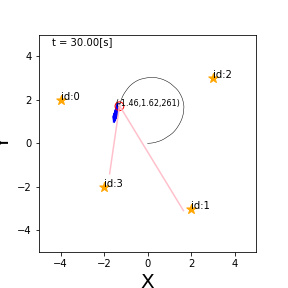

In [11]:
time_interval = 0.1
world = World(30, time_interval, debug=False)
    
m = Map()
for ln in [(-4,2),(2,-3),(3,3),(-2,-2)]:
    m.append_landmark(Landmark(*ln))
world.append(m)
    
initial_pose = np.array([0,0,0]).T
estimator = Mcl(m,initial_pose, 100)
a = EstimationAgent(time_interval, 0.2, 10.0/180*math.pi, estimator)
r = Robot(initial_pose, sensor=Camera(m), agent=a, color="red")
world.append(r)
    
world.draw()